PROYECCIÓN DE DATOS

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dateparser = lambda date: pd.datetime.strptime(date, '%d/%m/%Y') #identifica dia mes y año
data= pd.read_csv("inversiones/acciones/ARGOS.csv",encoding = 'cp1252', delimiter='\t') # Aceptar utf-8 encoding = 'cp1252'

ts = data["Ultimo"]
x  = data["Ultimo"].values
x = [s. replace('.','') for s in x]; 
x = [s. replace(',','.') for s in x];
v =  [float(s) for s in x];

print(data)

          Fecha    Ultimo  Apertura    Maximo    Mínimo     Vol.  % var.
0    21.05.2018  18.660,0  18.720,0  18.720,0  18.560,0  114,79K  -0,21%
1    18.05.2018  18.700,0  18.740,0  18.940,0  18.460,0  163,09K  -0,74%
2    17.05.2018  18.840,0  19.000,0  19.220,0  18.840,0  183,54K  -0,84%
3    16.05.2018  19.000,0  19.300,0  19.300,0  19.000,0   56,50K  -1,55%
4    15.05.2018  19.300,0  19.360,0  19.360,0  18.980,0  107,35K   0,00%
5    11.05.2018  19.300,0  19.060,0  19.300,0  19.060,0   34,53K   0,10%
6    10.05.2018  19.280,0  19.020,0  19.360,0  19.020,0   93,29K   1,37%
7    09.05.2018  19.020,0  18.940,0  19.280,0  18.900,0  121,76K   0,42%
8    08.05.2018  18.940,0  18.980,0  19.360,0  18.920,0  157,45K  -2,67%
9    07.05.2018  19.460,0  18.920,0  19.460,0  18.920,0   61,58K   0,83%
10   04.05.2018  19.300,0  19.400,0  19.480,0  19.100,0  203,07K   2,99%
11   03.05.2018  18.740,0  19.960,0  19.960,0  18.740,0  445,60K  -6,11%
12   02.05.2018  19.960,0  20.000,0  20.000,0  19.7

In [3]:
closingPrice = np.flipud(v); # Escribe el vector alrevez
print(closingPrice)

[17500. 17620. 17600. 18140. 18700. 18660. 18700. 18660. 18900. 18460.
 18000. 17840. 17440. 17400. 16800. 16820. 16880. 17260. 17100. 17020.
 17020. 16820. 16720. 16880. 16520. 16260. 16300. 16360. 16580. 16840.
 17100. 17100. 17000. 17200. 17380. 17300. 17140. 17260. 17000. 17120.
 17320. 17380. 17100. 17200. 17000. 16700. 16740. 16660. 17100. 16860.
 16780. 16780. 16720. 16760. 16800. 16760. 16860. 16760. 16900. 17000.
 16980. 17000. 16960. 16920. 17120. 17300. 17400. 16980. 16980. 16700.
 16720. 16400. 16600. 16900. 16940. 17080. 17340. 17140. 17140. 16320.
 15600. 15020. 15400. 16240. 16300. 16800. 16240. 16400. 17320. 18000.
 18300. 18200. 18080. 18360. 18240. 18200. 17880. 17920. 18160. 17720.
 17580. 17720. 17700. 17800. 17900. 17920. 17600. 17900. 17900. 17720.
 17860. 18000. 18060. 18040. 18000. 18400. 17500. 17380. 17240. 17600.
 17420. 17580. 17660. 17720. 17920. 17940. 17860. 17780. 17800. 17900.
 18000. 18040. 17960. 17900. 17680. 17580. 17000. 16500. 15620. 15800.
 15760

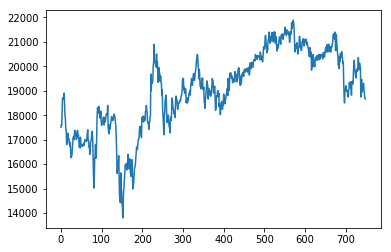

In [4]:
ts = pd.DataFrame(closingPrice)
plt.plot(closingPrice)

Parte 2 - SELECCIÓN DE DATOS

In [9]:
a1= closingPrice[0:20] # Sección de datos de 0 a 20
a2= closingPrice[0:50] # Sección de datos de 0 a 50
a3= closingPrice[0:100] # Sección de datos de 0 a 100
a4= closingPrice[0:200] # Sección de datos de 0 a 200
a5= closingPrice[0:300] # Sección de datos de 0 a 300
a6= closingPrice[0:500] # Sección de datos de 0 a 500
a7= closingPrice[0:800] # Sección de datos de 0 a 800

Parte 3 - MEDIA MOVIL SIMPLE

In [5]:
ts_SMA = ts.rolling(window=1).mean() # Media Móvil 4

In [7]:
ts_SMA1 = ts_SMA[0:20] 
ts_SMA2 = ts_SMA[0:50]
ts_SMA3 = ts_SMA[0:100]
ts_SMA4 = ts_SMA[0:200]
ts_SMA5 = ts_SMA[0:300]
ts_SMA6 = ts_SMA[0:500]
ts_SMA7 = ts_SMA[0:800]

Text(0,0.5,'Media Movil')

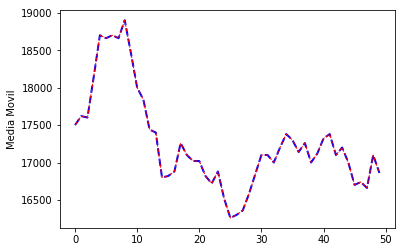

In [10]:
plt.plot(a2,"--", color="blue",lw=2)
plt.plot(ts_SMA2,"--",color="red",lw=1)
plt.ylabel("Media Movil")

PARTE 4 - AJUSTES A LA CURVA

In [11]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


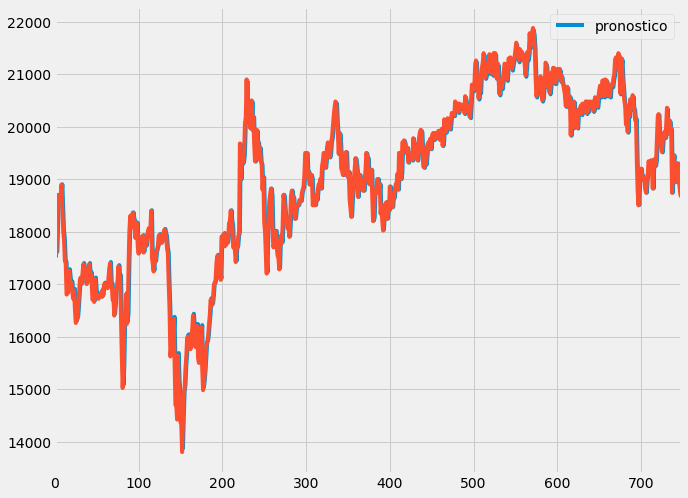

In [12]:
# Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(closingPrice, order=(1, 0, 0)) 
resultados = modelo.fit(disp=-1)
data['pronostico'] = resultados.fittedvalues
plot = data[['pronostico']].plot(figsize=(10, 8))
plt.plot(closingPrice)

In [13]:
print(resultados.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  749
Model:                     ARMA(1, 0)   Log Likelihood               -5261.201
Method:                       css-mle   S.D. of innovations            271.237
Date:                Sun, 22 Jul 2018   AIC                          10528.402
Time:                        18:54:45   BIC                          10542.259
Sample:                             0   HQIC                         10533.742
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.886e+04    632.168     29.828      0.000      1.76e+04  2.01e+04
ar.L1.y        0.9855      0.006    170.003      0.000         0.974     0.997
                                    Roots           

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [14]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA


In [15]:
# Prediccion de datos 750 a 755

predictions=resultados.predict(750, 755)
predictions

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([18662.84075052, 18665.64041327, 18668.39958255, 18671.11884403,
       18673.79877493, 18676.43994411, 18679.04291222])

In [16]:
data['pronostico'][1:20]

1     17519.618642
2     17637.882998
3     17618.172272
4     18150.361874
5     18702.262203
6     18662.840751
7     18702.262203
8     18662.840751
9     18899.369463
10    18465.733490
11    18012.386792
12    17854.700984
13    17460.486464
14    17421.065012
15    16829.743231
16    16849.453957
17    16908.586135
18    17283.089930
19    17125.404122
Name: pronostico, dtype: float64

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


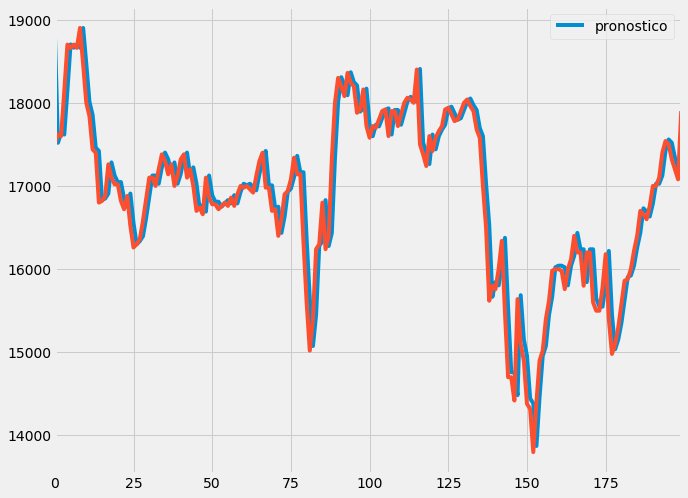

In [17]:
# Modelo ARIMA sobre el valor de cierre de la acción. de 0 a 300
modelo = sm.tsa.ARIMA(closingPrice, order=(1, 0, 0)) 
resultados = modelo.fit(disp=-1)
data['pronostico'] = resultados.fittedvalues
plot = data[['pronostico']][0:200].plot(figsize=(10, 8))
plt.plot(a4)

PARTE 5 - Predicción Modelos Arima

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


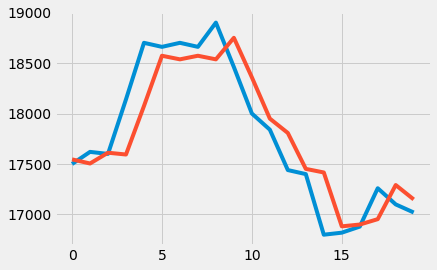

In [18]:
# Modelo ARIMA sobre el valor de cierre de la acción. de 0 a 20
modelo = sm.tsa.ARIMA(a1, order=(1, 0, 0)) 
resultados = modelo.fit(disp=-1)
pronostico1 = resultados.fittedvalues
pronostico1

#plot = pronostico1.plot(figsize=(10, 8))

plt.plot(a1)
plt.plot(pronostico1)

In [19]:
#print(resultados.summary().tables[0]) #Tabla 1
print(resultados.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   20
Model:                     ARMA(1, 0)   Log Likelihood                -143.077
Method:                       css-mle   S.D. of innovations            297.627
Date:                Sun, 22 Jul 2018   AIC                            292.154
Time:                        18:59:09   BIC                            295.141
Sample:                             0   HQIC                           292.737
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.755e+04    459.383     38.194      0.000      1.66e+04  1.84e+04
ar.L1.y        0.8890      0.082     10.779      0.000         0.727     1.051
                                    Roots           

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [20]:
# Prediccion de datos 21 a 50

predictions=resultados.predict(0, 50)
predictions

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([17545.85342993, 17505.08798697, 17611.77255043, 17593.99178985,
       18074.07232541, 18571.93362154, 18536.37210039, 18571.93362154,
       18536.37210039, 18749.7412273 , 18358.56449463, 17949.60700137,
       17807.36091677, 17451.74570524, 17416.18418409, 16882.76136681,
       16900.54212738, 16953.88440911, 17291.71886006, 17149.47277545,
       17078.34973314, 17130.22486488, 17176.34382974, 17217.34534335,
       17253.79724819, 17286.20437782, 17315.01554846, 17340.62977481,
       17363.40179612, 17383.64698906, 17401.64573548, 17417.64730552,
       17431.8733098 , 17444.52076861, 17455.76484045, 17465.76124792,
       17474.64843432, 17482.54948099, 17489.57381195, 17495.8187093 ,
       17501.37066053, 17506.30655631, 17510.69475536, 17514.59603119,
       17518.06441377, 17521.14793778, 17523.88930789, 17526.32649017,
       17528.4932379 , 17530.41955902, 17532.13213176])

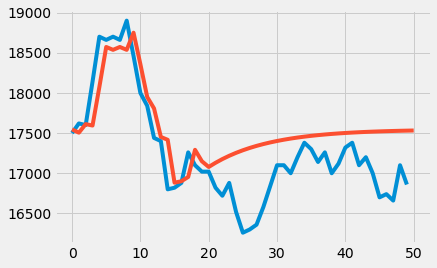

In [21]:
plt.plot(closingPrice[0:50])
plt.plot(predictions)

In [23]:
A1=print(a1)
Predictions = print(predictions)

[17500. 17620. 17600. 18140. 18700. 18660. 18700. 18660. 18900. 18460.
 18000. 17840. 17440. 17400. 16800. 16820. 16880. 17260. 17100. 17020.]
[17545.85342993 17505.08798697 17611.77255043 17593.99178985
 18074.07232541 18571.93362154 18536.37210039 18571.93362154
 18536.37210039 18749.7412273  18358.56449463 17949.60700137
 17807.36091677 17451.74570524 17416.18418409 16882.76136681
 16900.54212738 16953.88440911 17291.71886006 17149.47277545
 17078.34973314 17130.22486488 17176.34382974 17217.34534335
 17253.79724819 17286.20437782 17315.01554846 17340.62977481
 17363.40179612 17383.64698906 17401.64573548 17417.64730552
 17431.8733098  17444.52076861 17455.76484045 17465.76124792
 17474.64843432 17482.54948099 17489.57381195 17495.8187093
 17501.37066053 17506.30655631 17510.69475536 17514.59603119
 17518.06441377 17521.14793778 17523.88930789 17526.32649017
 17528.4932379  17530.41955902 17532.13213176]
